In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, FunctionTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Abhishek\Downloads\Car Price Dataset.csv")

In [3]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
df.drop(["ID","Name"], axis=1, inplace=True)

In [6]:
df.duplicated().sum()

np.int64(65)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16983 entries, 0 to 17047
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             16983 non-null  int64 
 1   Brand             16983 non-null  object
 2   Model             16983 non-null  object
 3   Variant           16983 non-null  object
 4   Series            16983 non-null  object
 5   Year              16983 non-null  int64 
 6   Kilometers        16983 non-null  int64 
 7   Type              16983 non-null  object
 8   Gearbox           16983 non-null  object
 9   Fuel              16983 non-null  object
 10  Status            16983 non-null  object
 11  CC                16983 non-null  int64 
 12  Color             16983 non-null  object
 13  Seating Capacity  16983 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


In [9]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [10]:
df["Price"].describe()

count     16983.000000
mean      36761.137255
std       30334.984257
min        1000.000000
25%       18799.500000
50%       29990.000000
75%       45990.000000
max      999000.000000
Name: Price, dtype: float64

In [11]:
np.round((df["Price"]*54.15).describe(), 2)

count       16983.00
mean      1990615.58
std       1642639.40
min         54150.00
25%       1017992.92
50%       1623958.50
75%       2490358.50
max      54095850.00
Name: Price, dtype: float64

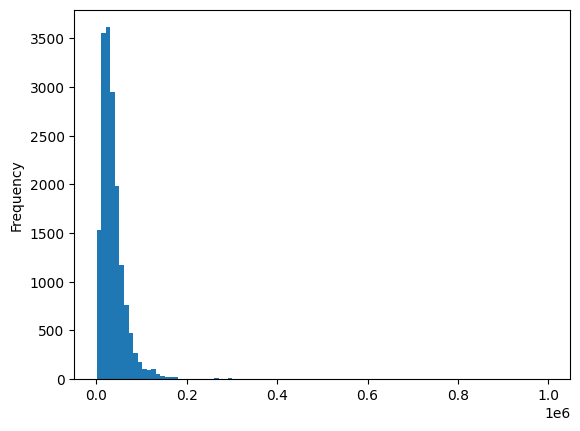

In [12]:
df["Price"].plot.hist(bins=100)
plt.show()

<Axes: >

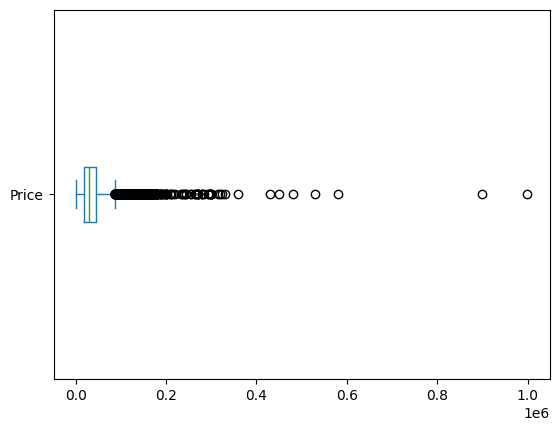

In [13]:
df["Price"].plot.box(vert=False)

In [14]:
def outlier_count(col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    res = df.query(f"{col} < {lower} | {col} > {upper}")
    return res

In [15]:
outlier_count("Price")

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
1,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
48,119985,Toyota,Landcruiser,LC200 VX (4X4),VDJ200R,2020,50943,Wagon,Automatic,Diesel,Used,4461,White,7
54,169990,Toyota,Landcruiser 70 Series,GXL,VDJ79R,2021,1008,Double Cab Chassis,Manual,Diesel,Used,4461,Blue,5
68,129900,Porsche,Boxster,Spyder,987 MY11,2010,66147,Roadster,Automatic,Premium Unleaded Petrol,Used,3436,Black,2
156,110990,Ram,1500,Warlock (black/Grey/HYD Blue),MY20,2020,39969,Crew Cab Utility,Automatic,Unleaded Petrol,Used,5654,Grey,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,89600,BMW,430I,M Sport,G22,2021,11338,Coupe,Automatic,Premium Unleaded Petrol,Used,1998,Black,4
16916,99800,Mercedes-Benz,A45,S 4Matic+,W177 MY21,2020,13802,Hatchback,Automatic,Premium Unleaded Petrol,Used,1991,White,5
16974,210800,BMW,X6,M Competition,F96,2021,18500,Wagon,Automatic,Premium Unleaded Petrol,Used,4395,Blue,5
16988,105000,Land Rover,Discovery,TD6 SE,MY17,2017,36000,Wagon,Automatic,Diesel,Used,2993,Orange,5


In [16]:
df["Brand"].value_counts()

Brand
Toyota             2750
Holden             1500
Ford               1490
Mazda              1164
Hyundai            1087
Mitsubishi         1072
Volkswagen         1012
Nissan             1005
Kia                 742
Subaru              654
Mercedes-Benz       623
Audi                518
BMW                 479
Honda               412
Jeep                379
Land Rover          273
Isuzu               267
Lexus               180
Volvo               160
Suzuki              160
Skoda               158
Renault             150
LDV                 116
MG                   95
Porsche              91
Mini                 66
Peugeot              45
Chrysler             42
Jaguar               38
HSV                  37
GWM                  28
Great Wall           27
Ram                  23
Fiat                 17
Dodge                14
Citroen              13
Ssangyong            11
Alfa Romeo           11
Infiniti              9
Maserati              8
Haval                 7
Bentley   

In [17]:
df['Brand'].value_counts().head(9).index.tolist()

['Toyota',
 'Holden',
 'Ford',
 'Mazda',
 'Hyundai',
 'Mitsubishi',
 'Volkswagen',
 'Nissan',
 'Kia']

In [18]:
df["Brand"] = df["Brand"].apply(lambda x: x if x in df['Brand'].value_counts().head(9)\
                               .index.tolist() else "Other")

In [19]:
df["Brand"].value_counts()

Brand
Other         5161
Toyota        2750
Holden        1500
Ford          1490
Mazda         1164
Hyundai       1087
Mitsubishi    1072
Volkswagen    1012
Nissan        1005
Kia            742
Name: count, dtype: int64

In [20]:
df["Model"].value_counts().head(9). index.tolist()

['Ranger',
 'Hilux',
 'Commodore',
 'Triton',
 'Corolla',
 'Navara',
 'RAV4',
 'Colorado',
 '3']

In [21]:
df["Model"] = df["Model"].apply(lambda x: x if x in df['Model'].value_counts().head(9)\
                               .index.tolist() else "Other")

In [22]:
df["Model"].value_counts()

Model
Other        13414
Ranger         648
Hilux          537
Commodore      490
Triton         368
Corolla        355
Navara         305
RAV4           304
Colorado       281
3              281
Name: count, dtype: int64

In [23]:
df.drop(["Variant", "Series"], axis=1, inplace=True)

In [24]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Other,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Other,Other,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Other,Other,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Other,Other,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Other,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [25]:
df["Year"].value_counts().sort_index()

Year
1989       2
1990       2
1991       2
1992       1
1993       4
1994       3
1995       7
1996       9
1997      10
1998      16
1999      15
2000      40
2001      45
2002      74
2003     117
2004     139
2005     186
2006     225
2007     327
2008     359
2009     391
2010     553
2011     586
2012     802
2013     946
2014    1006
2015    1206
2016    1443
2017    1812
2018    1888
2019    1621
2020    1028
2021    1004
2022    1114
Name: count, dtype: int64

In [26]:
df["Age"] = 2025 - df["Year"]

In [27]:
df["Age"] = pd.cut(df["Age"], bins=[2,5,10,17,26,36])

In [28]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,Other,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,"(10, 17]"
1,117990,Other,Other,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,"(2, 5]"
2,79990,Other,Other,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,"(2, 5]"
3,34990,Other,Other,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,"(10, 17]"
4,15990,Holden,Other,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5,"(5, 10]"


In [29]:
df.drop("Year", axis=1, inplace=True)

<Axes: ylabel='Frequency'>

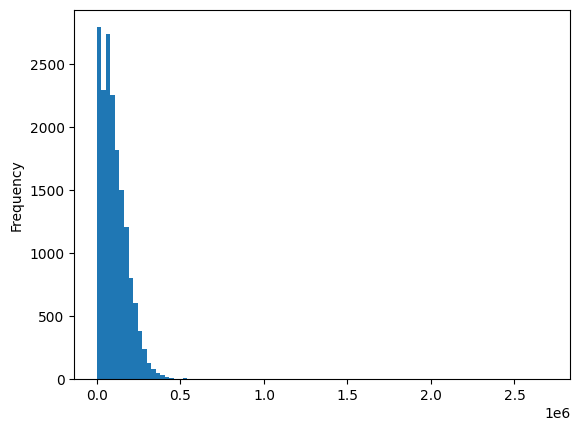

In [30]:
df["Kilometers"].plot.hist(bins=100)

<Axes: >

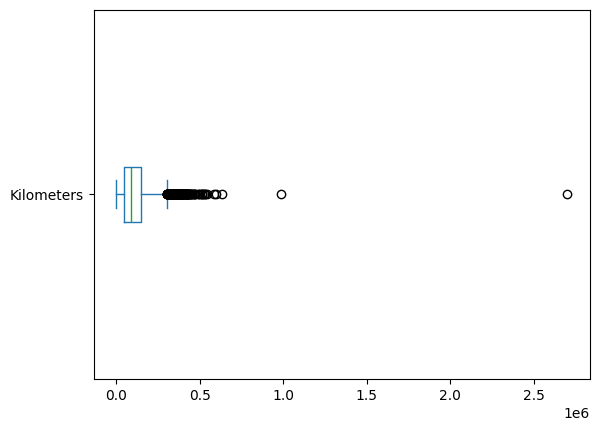

In [31]:
df["Kilometers"].plot.box(vert=False)

In [32]:
df = df.query("Kilometers < 500000")

In [33]:
df.head()

,Price,Brand,Model,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,Other,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,"(10, 17]"
1,117990,Other,Other,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,"(2, 5]"
2,79990,Other,Other,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,"(2, 5]"
3,34990,Other,Other,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,"(10, 17]"
4,15990,Holden,Other,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5,"(5, 10]"


In [34]:
df["Type"].value_counts()

Type
Wagon                    7735
Hatchback                2411
Sedan                    2318
Dual Cab Utility          655
Coupe                     468
Cab Chassis               424
Double Cab Pick Up        422
Dual Cab Pick-up          421
Van                       380
Crew Cab Pickup           268
Crew Cab Utility          207
Double Cab Utility        206
Utility                   178
Sportswagon               143
Double Cab Chassis         95
Crew Cab Chassis           77
Dual Cab Chassis           71
Convertible                44
Sportback                  43
Liftback                   39
Fastback                   36
Hardtop                    35
Softtop                    35
Cabriolet                  35
Super Cab Utility          23
Bus                        21
Space Cab Chassis          21
Super Cab Chassis          19
X Cab Pickup               13
Saloon                     13
Roadster                   13
Freestyle Cab Chassis      11
Space Cab Utility          10
King 

In [35]:
df["Type"] = df["Type"].apply(lambda x: x if x in df['Type'].value_counts().head(3)\
                                .index.tolist() else "Other")

In [36]:
df["Type"].value_counts()

Type
Wagon        7735
Other        4506
Hatchback    2411
Sedan        2318
Name: count, dtype: int64

In [37]:
df["Gearbox"].value_counts()

Gearbox
Automatic    14511
Manual        2435
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

In [38]:
df = df.query("Gearbox in ('Automatice', 'Manual')")

In [39]:
df["Gearbox"].value_counts()

Gearbox
Manual    2435
Name: count, dtype: int64

In [40]:
df.head()

,Price,Brand,Model,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
10,15490,Other,Other,231907,Other,Manual,Diesel,Used,2999,White,2,"(5, 10]"
11,12490,Ford,Other,64109,Hatchback,Manual,Unleaded Petrol,Used,1596,Black,5,"(10, 17]"
21,7000,Mazda,Other,77000,Hatchback,Manual,Unleaded Petrol,Used,1498,Blue,5,"(10, 17]"
27,38980,Nissan,Other,282190,Wagon,Manual,Diesel,Used,4169,Gold,7,"(17, 26]"
29,18990,Toyota,Other,383514,Wagon,Manual,Diesel,Used,2982,White,8,"(17, 26]"


In [41]:
df["Fuel"].value_counts()

Fuel
Diesel                     1130
Unleaded Petrol             904
Premium Unleaded Petrol     401
Name: count, dtype: int64

In [42]:
df["Fuel"] = df["Fuel"].str.replace("Unleaded ", "")

In [43]:
df["Fuel"].value_counts()

Fuel
Diesel            1130
Petrol             904
Premium Petrol     401
Name: count, dtype: int64

In [44]:
df["Fuel"] = df["Fuel"].apply(lambda x: x if x in df['Fuel'].value_counts().head(3)\
                                .index.tolist() else "Other")

In [45]:
df["Fuel"].value_counts()

Fuel
Diesel            1130
Petrol             904
Premium Petrol     401
Name: count, dtype: int64

In [46]:
df.head()

,Price,Brand,Model,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
10,15490,Other,Other,231907,Other,Manual,Diesel,Used,2999,White,2,"(5, 10]"
11,12490,Ford,Other,64109,Hatchback,Manual,Petrol,Used,1596,Black,5,"(10, 17]"
21,7000,Mazda,Other,77000,Hatchback,Manual,Petrol,Used,1498,Blue,5,"(10, 17]"
27,38980,Nissan,Other,282190,Wagon,Manual,Diesel,Used,4169,Gold,7,"(17, 26]"
29,18990,Toyota,Other,383514,Wagon,Manual,Diesel,Used,2982,White,8,"(17, 26]"


In [47]:
df["Status"].value_counts()

Status
Used            2403
New In Stock      20
Demo              12
Name: count, dtype: int64

In [48]:
df["Status"] = df["Status"].str.replace(" In Stock", "")

In [49]:
df.head()

,Price,Brand,Model,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
10,15490,Other,Other,231907,Other,Manual,Diesel,Used,2999,White,2,"(5, 10]"
11,12490,Ford,Other,64109,Hatchback,Manual,Petrol,Used,1596,Black,5,"(10, 17]"
21,7000,Mazda,Other,77000,Hatchback,Manual,Petrol,Used,1498,Blue,5,"(10, 17]"
27,38980,Nissan,Other,282190,Wagon,Manual,Diesel,Used,4169,Gold,7,"(17, 26]"
29,18990,Toyota,Other,383514,Wagon,Manual,Diesel,Used,2982,White,8,"(17, 26]"


In [50]:
df["CC"].describe()

count    2435.000000
mean     2589.062423
std      1007.445987
min       898.000000
25%      1994.000000
50%      2440.000000
75%      2982.000000
max      6200.000000
Name: CC, dtype: float64

<Axes: ylabel='Frequency'>

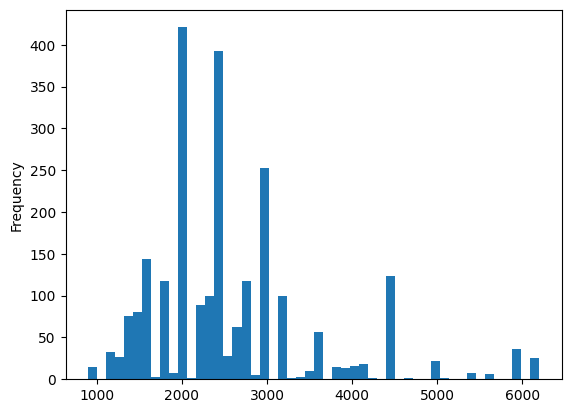

In [51]:
df["CC"].plot.hist(bins=50)

<Axes: >

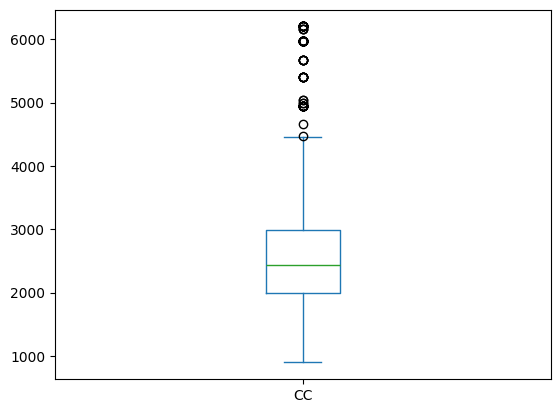

In [52]:
df["CC"].plot.box()

In [53]:
df["Color"].value_counts().head(10)

Color
White     1056
Silver     299
Black      248
Grey       225
Blue       224
Red        134
Green       38
Gold        35
Orange      25
Yellow      21
Name: count, dtype: int64

In [54]:
df["Color"] = df["Color"].apply(lambda x: x if x in df['Color'].value_counts().head(6)\
                                .index.tolist() else "Other")

In [55]:
df["Seating Capacity"].value_counts()

Seating Capacity
5     1660
2      314
4      198
3      181
7       60
8       14
6        5
14       2
11       1
Name: count, dtype: int64

In [56]:
df["Seating Capacity"] = pd.cut(df["Seating Capacity"], bins=[2,4,5,7,14])

In [57]:
df.head()

,Price,Brand,Model,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
10,15490,Other,Other,231907,Other,Manual,Diesel,Used,2999,White,NaN,"(5, 10]"
11,12490,Ford,Other,64109,Hatchback,Manual,Petrol,Used,1596,Black,"(4.0, 5.0]","(10, 17]"
21,7000,Mazda,Other,77000,Hatchback,Manual,Petrol,Used,1498,Blue,"(4.0, 5.0]","(10, 17]"
27,38980,Nissan,Other,282190,Wagon,Manual,Diesel,Used,4169,Other,"(5.0, 7.0]","(17, 26]"
29,18990,Toyota,Other,383514,Wagon,Manual,Diesel,Used,2982,White,"(7.0, 14.0]","(17, 26]"


In [58]:
num_cols = df.describe().columns[1:].tolist()

In [59]:
num_cols

['Kilometers', 'CC']

In [60]:
cat_col = [x for x in df.columns if x not in df.describe().columns]

In [61]:
cat_col

['Brand',
 'Model',
 'Type',
 'Gearbox',
 'Fuel',
 'Status',
 'Color',
 'Seating Capacity',
 'Age']

In [62]:
df.reset_index(drop=True, inplace=True)

In [63]:
ohe = OneHotEncoder(drop="first")

In [64]:
encoded = ohe.fit_transform(df[cat_col])

In [65]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16686 stored elements and shape (2435, 39)>

In [66]:
ohe.get_feature_names_out()

array(['Brand_Holden', 'Brand_Hyundai', 'Brand_Kia', 'Brand_Mazda',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Other', 'Brand_Toyota',
       'Brand_Volkswagen', 'Model_Colorado', 'Model_Commodore',
       'Model_Corolla', 'Model_Hilux', 'Model_Navara', 'Model_Other',
       'Model_RAV4', 'Model_Ranger', 'Model_Triton', 'Type_Other',
       'Type_Sedan', 'Type_Wagon', 'Fuel_Petrol', 'Fuel_Premium Petrol',
       'Status_ New', 'Status_ Used', 'Color_Blue', 'Color_Grey',
       'Color_Other', 'Color_Red', 'Color_Silver', 'Color_White',
       'Seating Capacity_(4.0, 5.0]', 'Seating Capacity_(5.0, 7.0]',
       'Seating Capacity_(7.0, 14.0]', 'Seating Capacity_nan',
       'Age_(5, 10]', 'Age_(10, 17]', 'Age_(17, 26]', 'Age_(26, 36]'],
      dtype=object)

In [67]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())

In [68]:
data = pd.concat([df.drop(cat_col, axis=1), enc oded_df], axis=1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3740848401.py, line 1)

In [ ]:
scaler = StandardScaler()

In [ ]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
data

In [ ]:
minmax = MinMaxScaler()

In [ ]:
data["Price"] = minmax.fit_transform(data[["Price"]])

In [ ]:
data.head()

In [ ]:
pwt = PowerTransformer(method="yeo-johnson")

In [ ]:
plt.hist(pwt.fit_transform(df[["Kilometers"]]), bins=100)
plt.show()

In [ ]:
plt.hist(pwt.fit_transform(df[["CC"]]), bins=30)
plt.show()

In [ ]:
data[num_cols] = pwt.fit_transform(df[num_cols])

In [ ]:
sns.histplot(data, x="Kilometers", kde=True)
plt.show()

In [ ]:
sns.histplot(data, x="CC", kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(2,30))
sns.heatmap(data.corrwith(data["Price"]).values.reshape(-1,1), annot=True, fmt=".2f",
            yticklabels=data.corr()["Price"].index)
plt.show()

In [ ]:
data.corrwith(df["Price"])

In [ ]:
data

In [ ]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=23)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_tr, y_tr)

In [ ]:
model.score(X_tr, y_tr)       #Training Score

In [ ]:
y_pr = model.predict(X_te)

In [ ]:
mean_squared_error(y_te, y_pr)

In [ ]:
r2_score(y_te, y_pr)             #Testing Score

In [ ]:
top_corr_cols = data.corr()["Price"].abs().sort_values(ascending=False).head(16)

In [ ]:
X_tr[top_corr_cols.index[1:]]

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_tr[top_corr_cols.index[1:]],y_tr)

In [ ]:
model2.score(X_tr[top_corr_cols.index[1:]],y_tr)

In [ ]:
y_pr2 = model2.predict(X_te[top_corr_cols.index[1:]])

In [ ]:
r2_score(y_te, y_pr2)

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_tr, y_tr)

In [ ]:
lasso_model.score(X_tr, y_tr)

In [ ]:
lasso_pred = lasso_model.predict(X_te)

In [ ]:
r2_score(y_te, lasso_pred)

In [ ]:
ridge_model = Ridge()

In [ ]:
ridge_model.fit(X_tr, y_tr)

In [ ]:
ridge_model.score(X_tr, y_tr)

In [ ]:
ridge_pred = ridge_model.predict(X_te)

In [ ]:
r2  = r2_score(y_te, ridge_pred)

In [ ]:
n, p = X_te.shape

In [ ]:
adj_r2 = 1- (((1-r2)*(n-1))/(n - p - 1))

In [ ]:
adj_r2

In [ ]:
r2

In [ ]:
X_te.shape